In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

Importing libraries and reading CSV file dataset 

In [ ]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
import io
data = pd.read_csv("/content/drive/MyDrive/mlproject/CTG.csv")

In [ ]:
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


PLOT - Distribution of 10 class dataset classification 

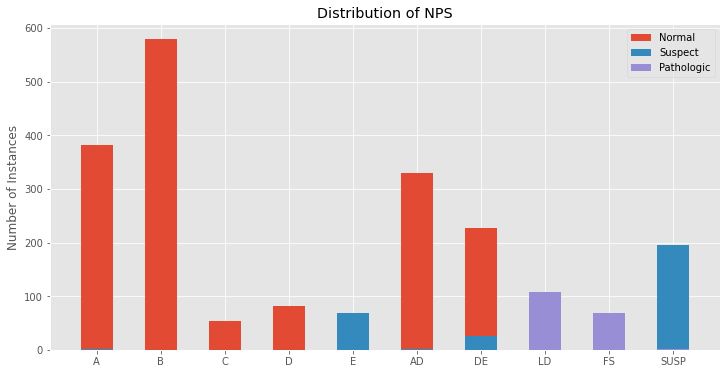

In [ ]:
data_extra = data[['CLASS','NSP']]
zeroes_after = pd.DataFrame(data=np.zeros(10,),index=[1,2,3,4,5,6,7,8,9,10])
arranged = np.arange(10) 
plt.figure(figsize=(12,6))
for NSP_V in range(1,4):
    changed_norm = data_extra.loc[(data_extra['NSP']==NSP_V)].drop('NSP', axis=1)
    changed_norm = (pd.value_counts(changed_norm['CLASS'].values, sort=False)).sort_index()
    changed_norm = pd.DataFrame(data=changed_norm, index=changed_norm.index)
    changed_norm = zeroes_after.add(changed_norm,axis='index',fill_value=0) 
    changed_norm = (changed_norm.values).reshape(-1)
    if NSP_V == 1 :
        p1 = plt.bar(arranged,changed_norm, 0.50)
    elif NSP_V == 2 :
        p2 = plt.bar(arranged,changed_norm,0.50)
    elif NSP_V == 3 :
        p3 = plt.bar(arranged,changed_norm,0.50)
plt.xticks(arranged, ('A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.ylabel('Number of Instances')
plt.title('Distribution of NPS')

plt.legend((p1[0], p2[0], p3[0]), ('Normal', 'Suspect', 'Pathologic'))
plt.show()

FEATURE SELECTION 

In [ ]:
#dropping unrequired columns 
data.drop(['FileName','Date', 'b','DR', 'LBE','SegFile','e','A','B','C','D','E','AD','DE','LD','FS','SUSP', 'CLASS'], inplace=True, axis=1)

In [ ]:
data.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
data

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,0.0,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,0.0,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,0.0,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,0.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   ASTV      2126 non-null   float64
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   float64
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   float64
 9   DS        2126 non-null   float64
 10  DP        2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

CLEANING DATA 

In [ ]:
#removing duplicate data points 
data = data.drop_duplicates()

In [ ]:
#No null data left 
data.isnull().sum().sum()

data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


NORMALIZATION OF DATA 

In [ ]:
#normalization 
from sklearn.preprocessing import MinMaxScaler

label = 'NSP'
X = data.drop(label, axis = 1)
Y = data[label]

normalize = MinMaxScaler()

X[X.columns] = normalize.fit_transform(X[X.columns])
X.head()
print(np.shape(X), np.shape(Y))

(2112, 21) (2112,)


DATA VISUALIZATION 

1) DISTRIBUTION OF DATA IN CLASSES - BAR GRAPH 


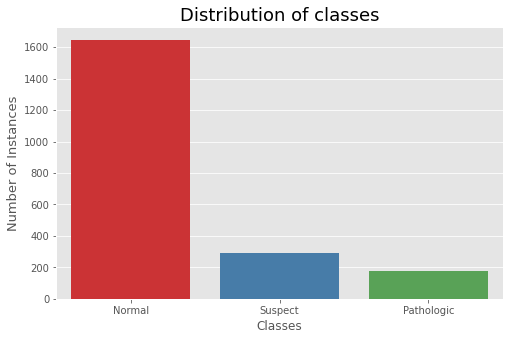

LB                                      ... Tendency                    
      count        mean       std    min    25%  ...      min  25%  50%  75%  max
NSP                                              ...                             
1.0  1646.0  131.998177  9.451492  106.0  125.0  ...     -1.0  0.0  0.0  1.0  1.0
2.0   292.0  141.650685  7.921950  120.0  137.0  ...     -1.0  0.0  0.0  1.0  1.0
3.0   174.0  131.563218  9.380463  110.0  128.0  ...     -1.0 -1.0  0.0  0.0  1.0

[3 rows x 168 columns]

In [ ]:
# DISTRIBUTION OF DATA IN CLASSES - BAR GRAPH
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x = 'NSP', data = data, palette = 'Set1')
plt.xticks(np.arange(3), ('Normal','Suspect', 'Pathologic'))
plt.xlabel('Classes', fontsize = 12)
plt.ylabel('Number of Instances', fontsize=13)
plt.title('Distribution of classes', fontsize = 18)
plt.show()
data.groupby("NSP").describe()

PLOT OF FEATURE CORRELATION HEATMAP 

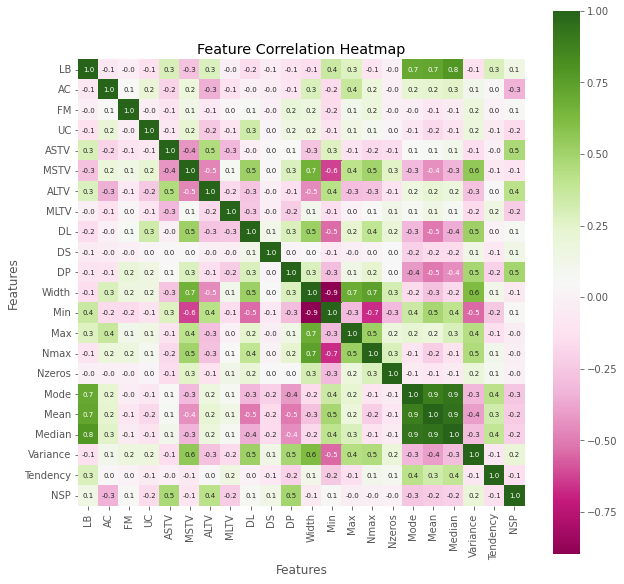

In [ ]:
# plot heatmap 
correlation = data.corr()
correlation.shape
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':7}, cmap="PiYG")
plt.title('Feature Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


BOXPLOT OF FEATURES 

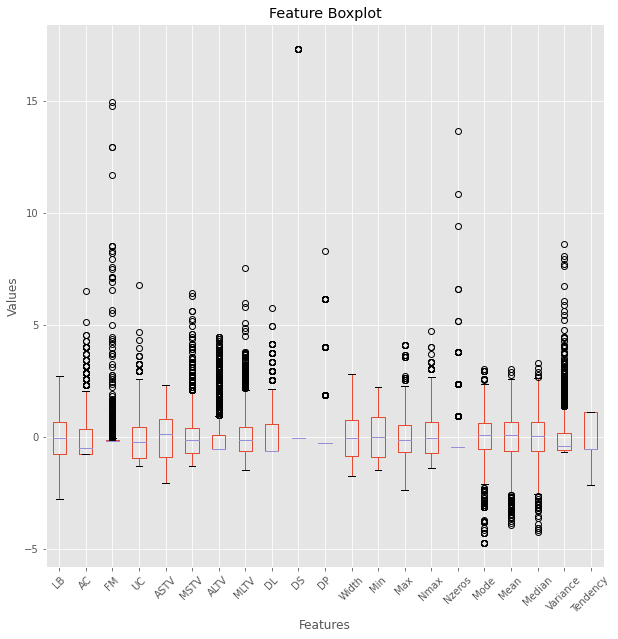

In [ ]:
import sklearn 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
X1 = data.drop('NSP', axis = 1)
df_scale_X = pd.DataFrame(sklearn.preprocessing.scale(X1), columns=X1.columns)
df_scale_X.boxplot(ax=ax, rot=45)
plt.title('Feature Boxplot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
RANDOM OVERSAMPLING 

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(X, Y)
print(np.shape(X), np.shape(Y))

(3584, 21) (3584,)


In [ ]:
from sklearn.model_selection import train_test_split, KFold , StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

TRAIN TEST SPLIT 

In [ ]:
dataframe = data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)


DIMENSIONALITY REDUCTION USING PCA AND AUTO ENCODERS 

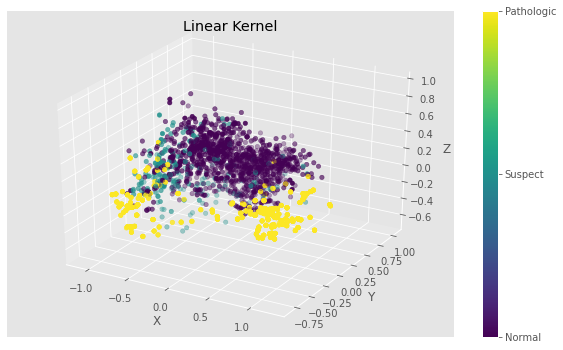

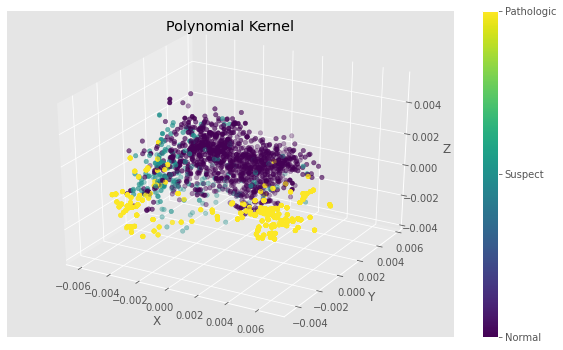

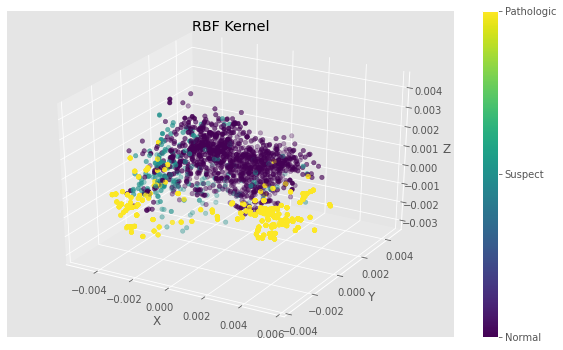

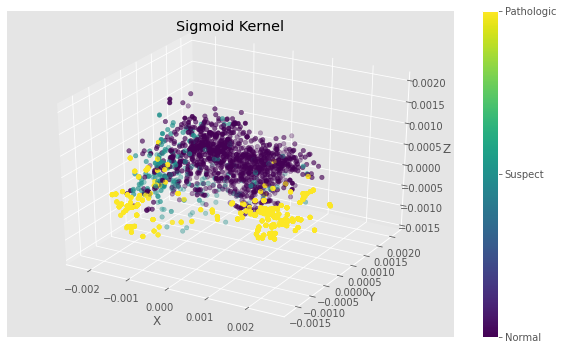

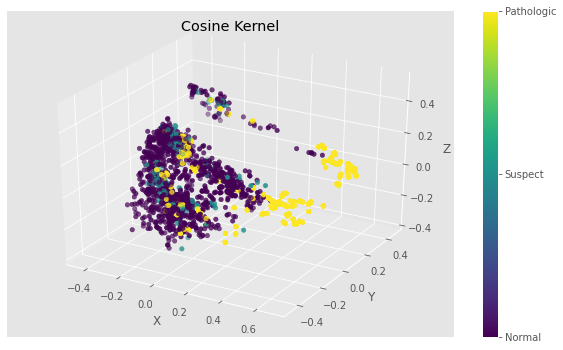

In [ ]:
# dimensionality reduction

from sklearn.decomposition import KernelPCA

names = ['Linear Kernel','Polynomial Kernel','RBF Kernel','Sigmoid Kernel','Cosine Kernel']

classifiers = [
KernelPCA(n_components = 3, kernel = 'linear'),
KernelPCA(n_components = 3, kernel = 'poly', gamma= 0.00001),
KernelPCA(n_components = 3, kernel = 'rbf', gamma= 0.00001), KernelPCA(n_components = 3, kernel = 'sigmoid', gamma= 0.00001), KernelPCA(n_components = 3, kernel = 'cosine',gamma=0.00001)
]

models=zip(names,classifiers)
   
for name, model_param in models:
    X_PCA = model_param.fit_transform(x_train)
    from mpl_toolkits.mplot3d import axes3d
    from matplotlib import style
    style.use('ggplot')
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(111, projection='3d')
    loc = [1,2,3]
    classes = ['Normal','Suspect','Pathologic']
    x3d = X_PCA[:,0]
    y3d = X_PCA[:,1]
    z3d = X_PCA[:,2]
    plot = ax1.scatter(x3d, y3d, z3d, c=y_train, cmap="viridis" )
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    cb = plt.colorbar(plot)
    cb.set_ticks(loc)
    cb.set_ticklabels(classes)
    plt.title(name)
    plt.show()


As could be seen in the above graphs, PCA technique could not distingush well the different classes and could not perform efficiently in separating the above in Normal, Suspect, and Pathelogic. Interesting thing seen here is that suspect in one or two kernals is seen to be closer in the graphs to normal and in others closer to pathelogical. 

In [ ]:
# using AE(autoencoder) 
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X_scaled = minmax_scale(X, axis = 0)
ncol = 20 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaled, Y, train_size = 0.7, random_state = seed(2017))
 
Class_train_1 = X_train_1[:, 20] 
Class_test_1 = X_test_1[:,20] 

X_train_1 = np.delete(X_train_1, 20, 1)  
X_test_1 = np.delete(X_test_1, 20, 1)  

input_dim = Input(shape = (ncol, ))

encoding_dim = 3

encoded = Dense(encoding_dim, activation = 'relu')(input_dim)

decoded = Dense(ncol, activation = 'sigmoid')(encoded)

autoencoder = keras.models.Model(inputs = input_dim, outputs = decoded)

autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.fit(X_train_1, X_train_1, epochs = 150, batch_size = 25, shuffle = True, validation_data = (X_test_1, X_test_1))

encoder = Model(inputs = input_dim, outputs = encoded)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test_1)

Epoch 1/150
101/101 [==============================] - 1s 3ms/step - loss: 0.6888 - val_loss: 0.6887
Epoch 2/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6886 - val_loss: 0.6886
Epoch 3/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6885 - val_loss: 0.6885
Epoch 4/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6884 - val_loss: 0.6884
Epoch 5/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6883 - val_loss: 0.6883
Epoch 6/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6882 - val_loss: 0.6881
Epoch 7/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6880 - val_loss: 0.6880
Epoch 8/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6879 - val_loss: 0.6878
Epoch 9/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6877 - val_loss: 0.6877
Epoch 10/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6876 - val_lo

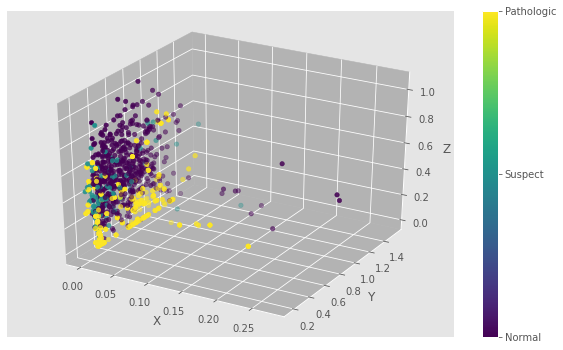

In [ ]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
style.use('ggplot')

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')
ax1.w_xaxis.set_pane_color((0.7, 0.7, 0.7, 1.0))
ax1.w_yaxis.set_pane_color((0.7, 0.7, 0.7, 1.0)) 
ax1.w_zaxis.set_pane_color((0.7, 0.7, 0.7, 1.0)) 

x3d = encoded_out[:,0]
y3d = encoded_out[:,1]
z3d = encoded_out[:,2]

plot = ax1.scatter(x3d, y3d, z3d, c=y_test_1, cmap="viridis", marker='o')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
cb = plt.colorbar(plot)
cb.set_ticks(loc)
cb.set_ticklabels(classes)
plt.show()

K FOLD CROSS VALIDATION 

In [ ]:
#K fold cross validation 

kf = KFold(n_splits=3, shuffle=True, random_state=786)

# x_train = x_train.to_numpy()
# x_test = x_test.to_numpy()
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()
for train, test in kf.split(x_train):
  print(x_train[train].shape, y_train[train].shape, x_train[test].shape, y_train[test].shape)

(1672, 21) (1672,) (836, 21) (836,)
(1672, 21) (1672,) (836, 21) (836,)
(1672, 21) (1672,) (836, 21) (836,)


MODELS

LOGISTIC REGRESSION 

In [ ]:
def GridSearchCV_lr(x_train, y_train): 
  pipe = Pipeline([('classifier' , LogisticRegression(random_state = 0))])
  param_grid = [
    {'classifier' : [LogisticRegression(solver = 'saga', max_iter = 5000, random_state = 0)],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 10),
    'classifier__multi_class' : ['ovr', 'multinomial']},
    {'classifier' : [LogisticRegression(max_iter = 3000, random_state = 0)],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 10),
    'classifier__multi_class' : ['ovr', 'multinomial'], 
     'classifier__solver' : ['sag', 'newton-cg']}
  ]
  gs = GridSearchCV(estimator=pipe,param_grid=param_grid)
  gs.get_params().keys()
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_params_

print(GridSearchCV_lr(x_train, y_train))

{'classifier': LogisticRegression(C=1291.5496650148827, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=0, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False), 'classifier__C': 1291.5496650148827, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}


In [ ]:
def train_logistic_regression(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_lr = LogisticRegression(C=1291.5496650148827, max_iter=5000, penalty='l2', solver='saga', multi_class = 'multinomial', random_state = 0)
    model_lr.fit(x_train,y_train)
    y_pred_lr = model_lr.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_lr) 
    accuracy_scores_log.append((accuracy))
  return model_lr 
  
model_lr = train_logistic_regression(x_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
def print_confusion_matrix(model): 
  y_pred = model.predict(x_test)
  conf = confusion_matrix(y_test,np.round(y_pred))
  label = ["N","S","P"]
  sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
  plt.show()

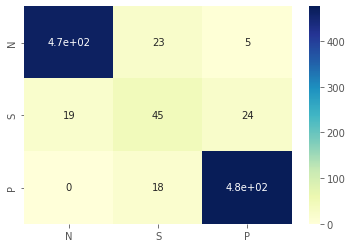

In [ ]:
print_confusion_matrix(model_lr)

In [ ]:
def print_metrics(model): 
  y_pred_lr = model.predict(x_test)
  clf_report = classification_report(y_test, y_pred_lr,target_names=label, output_dict=True)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  precision=precision_score(y_test, y_pred_lr,average='weighted')*100
  print("Precision: ", precision)
  recall=recall_score(y_test, y_pred_lr,average='weighted')*100
  print("Recall: ", recall)
  accuracy=accuracy_score(y_test, y_pred_lr)*100
  print("Accuracy: ", accuracy)
  f1 = f1_score(y_test,y_pred_lr,average='weighted')*100
  print("F1 score: ", f1)

Precision:  91.66594957961303
Recall:  91.72862453531599
Accuracy:  91.72862453531599
F1 score:  91.68772893734689


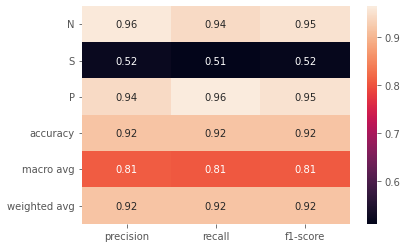

In [ ]:
print_metrics(model_lr)

K NEAREST NEIGHBORS 

In [ ]:
def GridSearchCV_knn(x_train, y_train): 
  classifier = KNeighborsClassifier()
  param_grid = {
     'weights' : ['uniform', 'distance'], 
     'n_neighbors' : range(1, 30), 
     'metric' : ['euclidean', 'manhattan'], 
     'algorithm' : ['ball_tree', 'kd_tree'], 
  }
  gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

print(GridSearchCV_knn(x_train, y_train))

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')


In [ ]:
def train_knn(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_knn = KNeighborsClassifier(n_neighbors= 2, metric = 'euclidean', weights = 'distance', algorithm = 'ball_tree')
    model_knn.fit(x_train,y_train)
    y_pred_knn = model_knn.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_knn) 
    accuracy_scores_log.append((accuracy))
  return model_knn 
  
model_knn = train_knn(x_train, y_train)

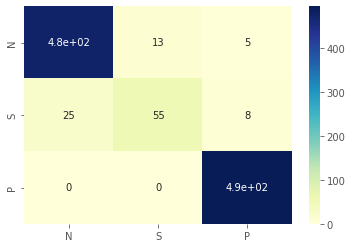

In [ ]:
print_confusion_matrix(model_knn)

Precision:  94.96831833817605
Recall:  95.26022304832715
Accuracy:  95.26022304832715
F1 score:  95.00808121906176


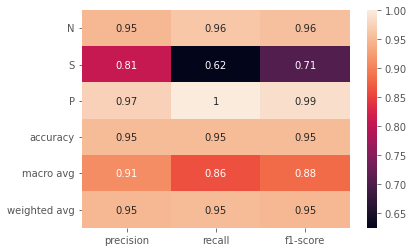

In [ ]:
print_metrics(model_knn)

DESCISION TREES 

In [ ]:
def GridSearchCV_dt(x_train, y_train): 
  classifier = DecisionTreeClassifier(random_state = seed(7))
  param_grid = {
     "max_depth": range(5, 30),
     "criterion" : ["gini", "entropy"], 
     "splitter" : ['best', 'random'], 
     "max_features" : ['auto', 'sqrt', 'log2']
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

print(GridSearchCV_dt(x_train, y_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
def train_dt(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_dt = DecisionTreeClassifier(max_depth = 12, criterion = "entropy", splitter = "best", max_features = "auto" , random_state=seed(7))
    model_dt.fit(x_train,y_train)
    y_pred_dt = model_dt.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_dt) 
    accuracy_scores_log.append((accuracy))
  return model_dt 
  
model_dt = train_dt(x_train, y_train)

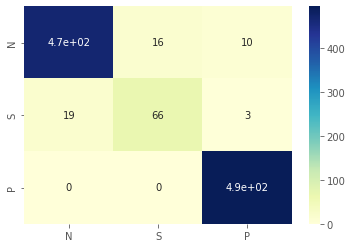

In [ ]:
print_confusion_matrix(model_dt)

Precision:  95.43582723141262
Recall:  95.53903345724906
Accuracy:  95.53903345724906
F1 score:  95.46963539873659


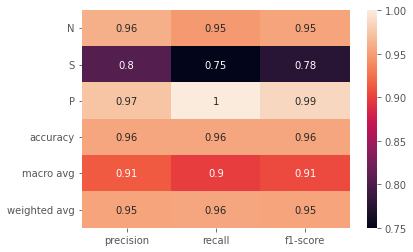

In [ ]:
print_metrics(model_dt)

RANDOM FORESTS 

In [ ]:
def GridSearchCV_rf(x_train, y_train): 
  classifier = RandomForestClassifier(random_state = 7)
  param_grid = {
      'n_estimators': [10,30,50,100,125,135,150,160, 200, 400], 
      'max_features': ['auto', 'sqrt', 'log2'], 
      "criterion" : ["gini", "entropy"], 
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

print(GridSearchCV_rf(x_train, y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=135,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)


In [ ]:
def train_rf(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_rf = RandomForestClassifier(n_estimators=135, criterion = "entropy", max_features = 'auto', )
    model_rf.fit(x_train,y_train)
    y_pred_rf = model_rf.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_rf) 
    accuracy_scores_log.append((accuracy))
  return model_rf 
  
model_rf = train_rf(x_train, y_train)



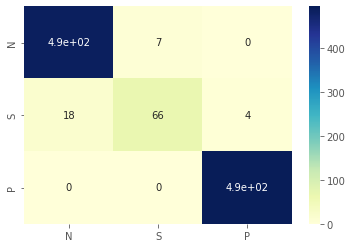

In [ ]:
print_confusion_matrix(model_rf)

Precision:  97.21058099977634
Recall:  97.30483271375465
Accuracy:  97.30483271375465
F1 score:  97.19282253501376


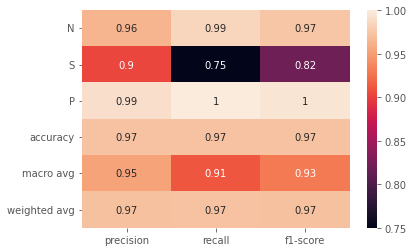

In [ ]:
print_metrics(model_rf)

NAIVE BAYES 


In [ ]:
def train_nb(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_nb = GridSearchCV(estimator = GaussianNB(), param_grid = {'var_smoothing' : np.logspace(5, -10, num = 1000)}) 
    model_nb.fit(x_train,y_train)
    print(model_nb.best_estimator_)
    y_pred_nb = model_nb.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_nb) 
    accuracy_scores_log.append((accuracy))
  return model_nb
  
model_nb = train_nb(x_train, y_train)


GaussianNB(priors=None, var_smoothing=0.13936192742241435)
GaussianNB(priors=None, var_smoothing=0.13936192742241435)
GaussianNB(priors=None, var_smoothing=0.13936192742241435)


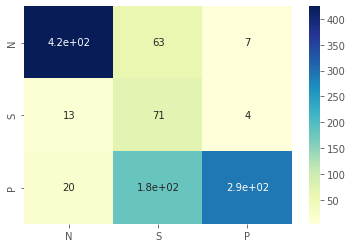

In [ ]:
print_confusion_matrix(model_nb)

Precision:  88.67717342662735
Recall:  73.14126394052045
Accuracy:  73.14126394052045
F1 score:  77.45394312641466


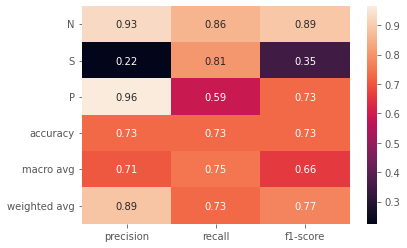

In [ ]:
print_metrics(model_nb)

EVALUATION METRICS COMPARISON PLOT 

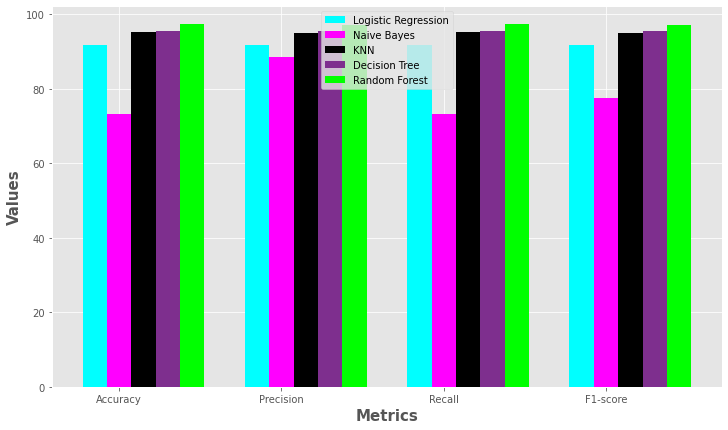

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12,7))
 
# set height of bar
LogisticRegression = [ 91.72,  91.66,  91.72,  91.68]
GaussianNB = [73.14, 88.68, 73.14,  77.45]
DecisionTreeClassifier = [95.54, 95.44,95.53,  95.46]
RandomForestClassifier = [97.30, 97.21, 97.30, 97.11]
KNN = [95.26, 94.96,  95.26,  95.01]
 
# Set position of bar on X axis
br1 = np.arange(len(LogisticRegression))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
# Make the plot
plt.bar(br1, LogisticRegression, color ='#00FFFF', width = barWidth,label ='Logistic Regression')
plt.bar(br2, GaussianNB, color ='#FF00FF', width = barWidth, label ='Naive Bayes')
plt.bar(br3, KNN, color ='k', width = barWidth, label ='KNN')
plt.bar(br4, DecisionTreeClassifier, color ='#7E2F8E', width = barWidth, label ='Decision Tree')
plt.bar(br5, RandomForestClassifier, color ='#00FF00', width = barWidth, label ='Random Forest')


# Adding Xticks
plt.xlabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(LogisticRegression))],
        ['Accuracy', 'Precision', 'Recall', 'F1-score'])
 
plt.legend()
plt.show()